# HW Assignment 9
## Gal Dali

### Problem 1
#### Quantum Phase Estimation (QPE)

##### Goal: find (estimate) $\theta$

$ U | \psi \rangle = e^{2 \pi i \theta} | \psi \rangle $

$ \psi_0 = | 0 \rangle^{\otimes t}|\psi \rangle $

$ |\psi_1⟩ = (H^{\otimes t} \otimes  I)|\psi_0⟩ = \frac{1}{2^{\frac{t}{2}}}(|0⟩ + |1⟩)^{\otimes t}|\psi⟩ = \frac{1}{2^{t/2}}\sum_{j=0}^{2^t-1}|j⟩|\psi⟩. $

$ |\psi_2⟩ = U_C|\psi_1⟩ = \left( \frac{1}{2^{t/2}} \sum_{k=0}^{2^t-1} e^{2\pi i \theta k} |k⟩ \right) \otimes |\psi⟩, $
$ \text{ (I used the eigen-value equation, $U_c$ is the controlled $U$ gate)} $

$ |\tilde{\psi}_3\rangle = QFT_{2^t}^{\dagger}|\tilde{\psi}_2\rangle. $


#### 1.a

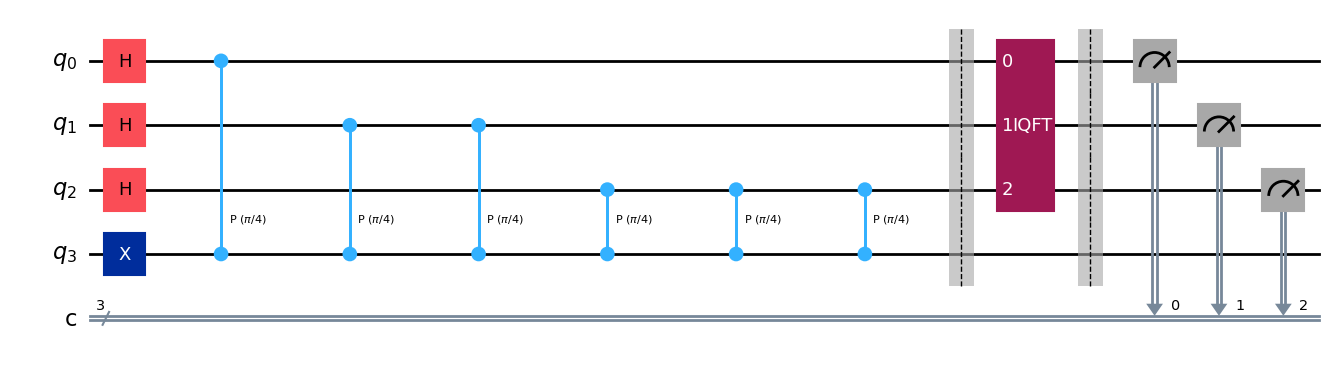

In [28]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import QFT
import numpy as np

num_of_qubits = 4
qc = QuantumCircuit(num_of_qubits, num_of_qubits - 1)  # 2 registers

for i in range(num_of_qubits - 1): qc.h(i)
qc.x(num_of_qubits - 1)

theta = np.pi / 4

for i in range(num_of_qubits - 1):
    for _ in range(i + 1):
        qc.cp(theta, i, num_of_qubits - 1)

qc.barrier()

QFT_dagger = QFT(num_of_qubits - 1).inverse()
qc.append(QFT_dagger, range(num_of_qubits - 1))
qc.barrier()

for i in range(num_of_qubits - 1): qc.measure(i, i)

qc.draw(output='mpl')

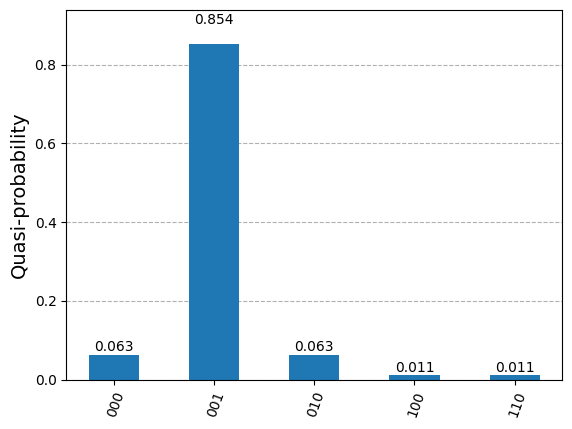

In [43]:
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram
import warnings

# should use the newer 'StatevectorSampler'.
warnings.filterwarnings("ignore", category=DeprecationWarning, module="qiskit.primitives.Sampler")
results = Sampler().run(qc).result()
statistics = results.quasi_dists[0].binary_probabilities()
display(plot_histogram(statistics))

#### 1.b

We get that the answer is $001_b$ = 1 in decimal just as we expected!

In [ ]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import QFT
import numpy as np

phi = np.pi / 4
phase_gate = [[1, 0], [0, np.exp(1j * phi)]]

num_of_qubits = 4
qc = QuantumCircuit(num_of_qubits + 1, num_of_qubits)

qc.h(range(num_of_qubits))

# Apply controlled-U gates
for i in range(num_of_qubits):
    # Controlled-U^(2^i)
    qc.cp(2 * np.pi * 2 ** (-i - 1), i, t)

# Apply inverse Quantum Fourier Transform
qc.append(QFT(num_qubits=num_of_qubits, do_swaps=False).inverse(), range(num_of_qubits))

# Measure the counting qubits
qc.measure(range(num_of_qubits), range(num_of_qubits))

# Draw the circuit
qc.draw(output='mpl')


In [ ]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.circuit.library import QFT
import numpy as np

# Define the phase gate
phi = np.pi / 4
phase_gate = [[1, 0],
              [0, np.exp(1j * phi)]]

# Create a Quantum Circuit
t = 3  # Number of counting qubits
qc = QuantumCircuit(t + 1, t)

# Apply Hadamard gates to counting qubits
qc.h(range(t))

# Controlled-U operations
for qubit in range(t):
    qc.cp(2 * np.pi * 2 ** (-qubit - 1), qubit, t)

# Apply inverse QFT to the counting qubits
qc.append(QFT(num_qubits=t, do_swaps=False).inverse(), range(t))

# Measure the counting qubits
qc.measure(range(t), range(t))

# Draw the circuit
print(qc.draw())


In [ ]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator

# Create a new circuit with two qubits
qc = QuantumCircuit(2)

# Add a Hadamard gate to qubit 0
qc.h(0)

# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)

# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
# Remove the "mpl" argument to get a text drawing.
qc.draw("mpl")